使用 input() 函数输入一个人的姓名、年龄和手机号码，再分别使用 %格式符和format格式符输出： 姓名：….，年龄： ….，手机号码： ……

In [3]:
name,age,tele=input("请输入你的姓名、年龄和电话号码：").split(',')
print("姓名：%s,年龄：%s,手机号码：%s"%(name,age,tele))
print(f"姓名：{name},年龄：{age},手机号码：{tele}")

请输入你的姓名、年龄和电话号码：张国庆,18,19216819201
姓名：张国庆,年龄：18,手机号码：19216819201
姓名：张国庆,年龄：18,手机号码：19216819201


使用input() 函数输入任意一个实数，如 123456.345745782 ，使用%格式符输出此实数，要求格式的宽度为20，保留小数4位。

In [4]:
print("%20.4f"%(float(input("请输入任意一个实数："))))

请输入任意一个实数：123456.345745782
         123456.3457


使用input()函数输入任意一个实数，如123456.345745782，使用format格式函数输出此实数，要求格式的宽度为20，保留小数4位，用逗号表示千分位号，数据呈右对齐，左边空位用#填充。

In [13]:
print("{:#>20,.4f}".format(float(input("请输入任意一个实数："))))

请输入任意一个实数：123456.345745782
########123,456.3457


使用input()函数分别输入二个字符串，编写一函数，传入这两个字符串，在函数中查找第二个字符串是否存在于第一个字符串中，若存在，返回在第一个字符串中的位置下标索引，若不存在，则返回None。

In [15]:
def search(ch1,ch2):
    n=ch1.find(ch2)
    return n if n!=-1 else None
search(*(input("请输入两个字符串：").split(',')))        

请输入两个字符串：asdjeytkhdsagy,khd


7

有一个字符串words=”I am a \tstudent. \n\n You are  a teacher.”，各单词之间存在多个不同的空格或空字符，编程让各单词之间只保留一个空格作为分隔符。

In [16]:
words="I am a \tstudent. \n\n You are  a teacher."
words=" ".join(words.split())
print(words)

I am a student. You are a teacher.


有一个字符串：
words="i am a student. you are a teacher. he is a worker. she is a nurse. we are all chinese.",
编程将该字符串中每条语句的第一个单词首字母改为大写字母，并输出字符数最多的那条语句。

In [27]:
words="i am a student. you are a teacher. he is a worker. she is a nurse. we are all chinese."
wls=[line.strip().capitalize() for line in words.split('.',4)]
words='. '.join(wls)
print(words)
print(max(wls,key=lambda x:len(x)))

I am a student. You are a teacher. He is a worker. She is a nurse. We are all chinese.
We are all chinese.


微软windows 10软件安装的产品密钥是由五个5位字符(英文大写字母或阿拉伯数字)长度的字符串用“-”连接组成，请编写函数，返回随机产生的产品密钥。

In [3]:
import random,collections
import string
def password():
    words=string.ascii_uppercase+string.digits
    return "-".join(["".join([random.choice(words) for i in range(5)]) for j in range(5)])
print(password())

5AN0H-PPBAK-Z360X-9C06V-0T6BK


分别从网上下载或拷贝一篇单词数量不少于20000的英文文档(如美国总统的就职演说稿)及一篇不少于20000中文字符的文章(如李克强总理的政府工作报告)各一篇，带有白色背景的轮廓图片二张。
(1)英文词频统计，去除无意义的词频数据，分别统计出单词字母数量最多的前10个单词，及单词出现次数最多的前30个单词，用出现次数最多的前30个单词制作一长为800，高为600，背景色为白色，最大字体尺寸为 200 ，最小字体尺寸为20的词云图，试据统计结果结合词云图的展示，提出自己对此英文文档分析的内涵与结果。
(2)中文文档需分别按名词词性和动词词性进行词频统计，再用二张图片分别制作带有图片色彩的遮罩词云图，分别输出出现次数最多的名词和动词各50个。试据统计结果结合词云图的展示提出自己对此篇文档分析的内涵与结果。


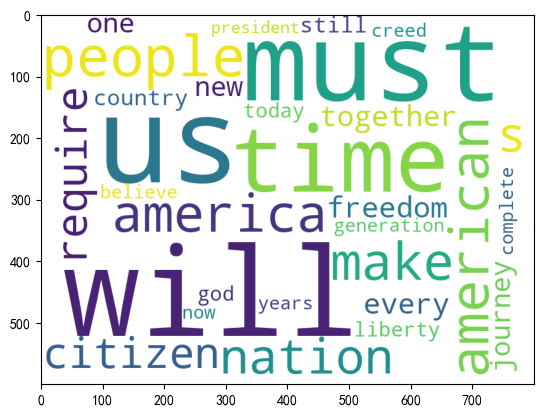

In [14]:
import jieba.posseg as psg
from collections import Counter
from wordcloud import WordCloud,ImageColorGenerator
from imageio import imread
import string
import matplotlib.pyplot as plt
%matplotlib inline

txt=open(r'.\abm2013.txt').read()
txt=txt.lower()                           #全部转换成小写字母
errs=string.punctuation                   #取string库中非字母及数字的字符
for c in errs:                            #将文档中非字母及数字的字符更换为一个空格
    txt=txt.replace(c,' ')
wc=WordCloud(width=800,height=600,       #创建词云对象，设置图片的宽度和高度
            background_color='white',     
            max_words=30,
            max_font_size=200,
            min_font_size=20)
wimg=wc.generate(txt)                    #用英文文档直接生成词云图对象
plt.imshow(wimg)                         #显示词云图
wimg.to_file(r'.\abm2013.jpg')    #把词云图作为图片文件保存到本地

In [16]:
words=open(r'.\zfgzbg.txt',encoding='utf-8').read()   #读入政府工作报告，
errs="，。：；‘’“”（）－ -　、！？\n—%％."              #收集需从文档中删除的字符
for ch in errs:                                             #将文档中需删除的字符全部删除
    words=words.replace(ch,"")
wlst=psg.lcut(words)                                        #对中文文档按词性进行分词，保存在列表中

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.834 seconds.
Prefix dict has been built successfully.


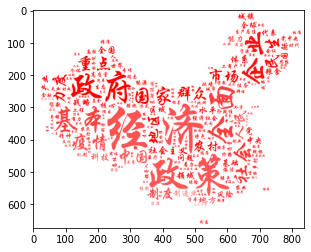

In [55]:
nlst=[w.word for w in wlst if w.flag in ('n','ns','nt')]    #使用列表推导式分离名词词性的词
ndic=collections.Counter(nlst)                               #生成词频统计字典
img_n=imread(r'.\chinamap.png')                  #读入一张图片数字化

wcn=WordCloud(font_path="STXINGKA.TTF",       #生成带图片遮罩的词云对象，注意，中文词云图，要加载中文字库
              mask=img_n,
             background_color='white')

wimg=wcn.generate_from_frequencies(ndic)                      #使用字典数据生成词云图对象
img_color=ImageColorGenerator(img_n)                          #获取图片的颜色
wnimg=wimg.recolor(color_func=img_color)                      #在词云图对象上加载图片的颜色

plt.imshow(wnimg)

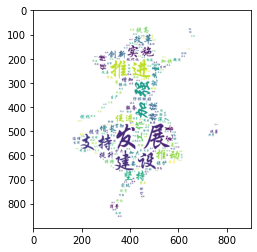

In [54]:
vlst=[w.word for w in wlst if w.flag in ('v','vn','vd')]
vdic=collections.Counter(vlst)
img_v=imread(r'.\girl.png')
wcn=WordCloud(font_path=r".\STXINGKA.TTF",
              mask=img_v,
             background_color='white')
wimg=wcn.generate_from_frequencies(vdic)
plt.imshow(wimg)


参考课件，根据从网上下载的《水浒》小说电子书。
(1)统计书中108将的出场情况，注意108将的姓名及各自绰号次数的累加，统计输出108将出现的次数，按降序输出108将人名及次数。

In [4]:
from collections import Counter          #导入统计函数
from  itertools import combinations      #导入组合函数
import string,json
import matplotlib.pyplot as plt
%matplotlib inline

txt=open(r".\shuihuzuan.txt",encoding='utf-8').read()     #读入水浒传电子文档
shjson=open(r".\shuihurw.json",encoding="gb18030")      #读入人物绰号与人名的json文件
shrwdic=json.load(shjson)                                              #转换成人物绰号与人名字典

shname=set(shrwdic.values())      #取人物姓名
shzh=set(shrwdic.keys())          #取人物绰号

for zh in shzh:                   #根据人物绰号，将文档中各人所有的绰号用各人的姓氏替换
    txt=txt.replace(zh,shrwdic.get(zh))

#使用字符串的计数方法，统计每个人物姓名出现的次数，通过字典推导式构建人物姓名及出现次数的字典
shrw_tj={name:txt.count(name) for name in shname}    
#对人物姓名及出现次数的字典按次数降序排列
rwcount_ls=sorted(shrw_tj.items(),key=lambda x:x[1],reverse=True)


#输出出场次数的名次、人名及出场次数：
for i in range(len(rwcount_ls)):
    print("名次：{} \t姓名：{}\t出场次数：{}".format(i+1,rwcount_ls[i][0],rwcount_ls[i][1]))

名次：1 	姓名：宋江	出场次数：3811
名次：2 	姓名：李逵	出场次数：1248
名次：3 	姓名：武松	出场次数：1184
名次：4 	姓名：林冲	出场次数：825
名次：5 	姓名：吴用	出场次数：731
名次：6 	姓名：戴宗	出场次数：653
名次：7 	姓名：卢俊义	出场次数：566
名次：8 	姓名：燕青	出场次数：534
名次：9 	姓名：花荣	出场次数：461
名次：10 	姓名：石秀	出场次数：397
名次：11 	姓名：杨志	出场次数：395
名次：12 	姓名：鲁智深	出场次数：390
名次：13 	姓名：柴进	出场次数：374
名次：14 	姓名：呼延灼	出场次数：373
名次：15 	姓名：秦明	出场次数：342
名次：16 	姓名：关胜	出场次数：329
名次：17 	姓名：史进	出场次数：322
名次：18 	姓名：公孙胜	出场次数：302
名次：19 	姓名：张清	出场次数：299
名次：20 	姓名：朱仝	出场次数：295
名次：21 	姓名：张顺	出场次数：292
名次：22 	姓名：李俊	出场次数：287
名次：23 	姓名：杨雄	出场次数：279
名次：24 	姓名：雷横	出场次数：221
名次：25 	姓名：徐宁	出场次数：221
名次：26 	姓名：时迁	出场次数：218
名次：27 	姓名：解珍	出场次数：197
名次：28 	姓名：解宝	出场次数：192
名次：29 	姓名：孙立	出场次数：187
名次：30 	姓名：董平	出场次数：183
名次：31 	姓名：刘唐	出场次数：180
名次：32 	姓名：索超	出场次数：170
名次：33 	姓名：黄信	出场次数：160
名次：34 	姓名：朱武	出场次数：150
名次：35 	姓名：朱贵	出场次数：149
名次：36 	姓名：施恩	出场次数：146
名次：37 	姓名：燕顺	出场次数：137
名次：38 	姓名：扈三娘	出场次数：135
名次：39 	姓名：李应	出场次数：134
名次：40 	姓名：萧让	出场次数：130
名次：41 	姓名：杨林	出场次数：128
名次：42 	姓名：穆弘	出场次数：126
名次：43 	姓名：阮小七	出场次数：123
名次：44 	姓名：张横	出场次数：120
名次：45 	姓名：顾大嫂	出场次数：119
名次：46 	姓名

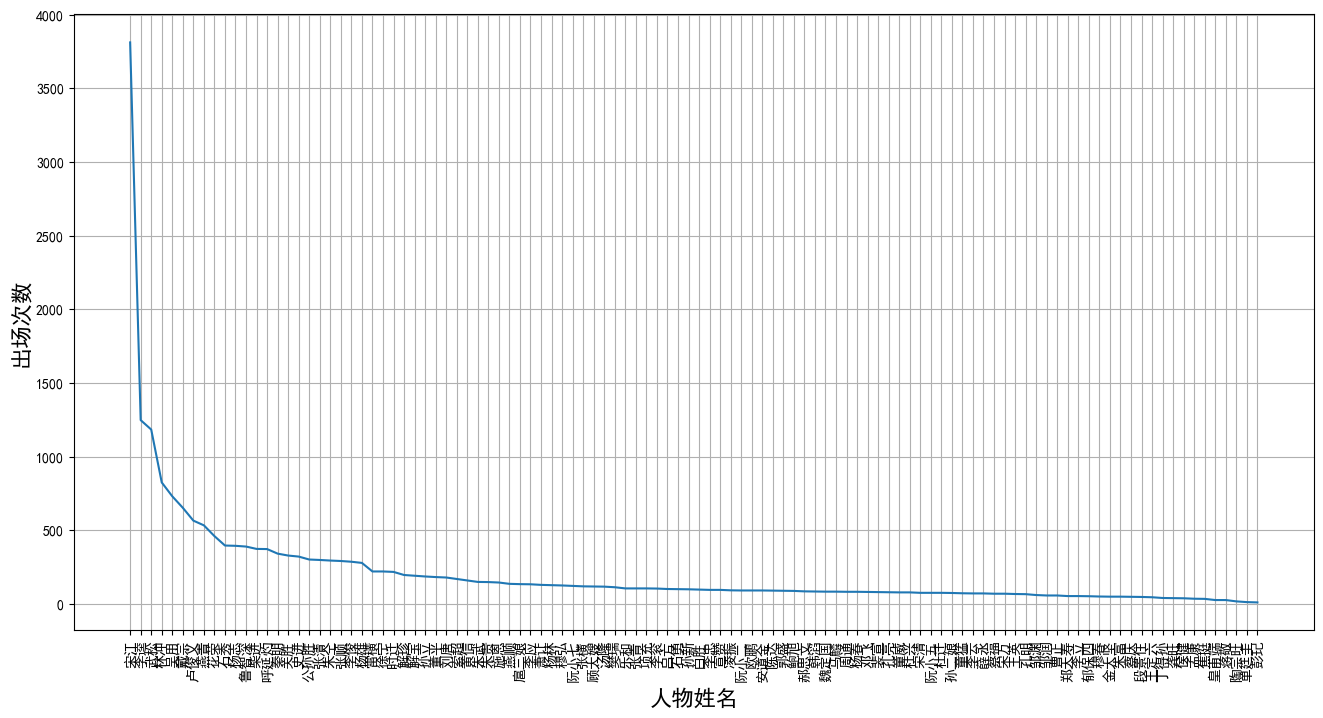

In [5]:
plt.rcParams['font.sans-serif']=["simhei"]     #使用在图表中可以显示中文
#plt.rcParams['axes.unicode_minus']=False
x=[w[0] for w in rwcount_ls]                  #取人物姓名
y=[w[1] for w in rwcount_ls]                  #取人物出场次数
plt.figure(figsize=(16,8))                     #设置图表尺寸
plt.xticks(rotation=90)                        #设置x轴刻度值逆时针旋转90
plt.xlabel('人物姓名',fontsize=16)             #增加x轴标注
plt.ylabel('出场次数',fontsize=16)             #增加Y轴标注
plt.grid()                                     #图表添加网络线
plt.plot(x,y);                                 #绘制折线图 

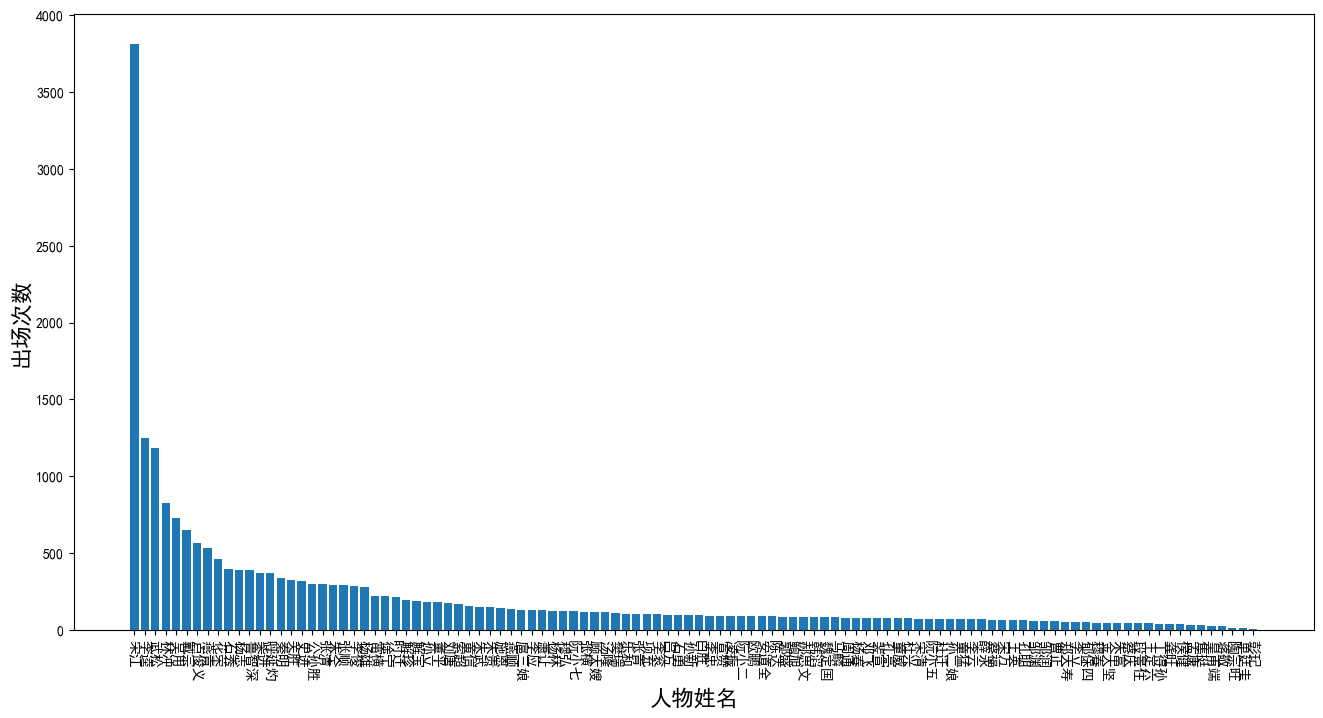

In [6]:
plt.figure(figsize=(16,8))
plt.bar(x,y)                       #显示柱状图
plt.xlabel('人物姓名',fontsize=16)      #增加x轴标注
plt.ylabel('出场次数',fontsize=16)   #增加Y轴标注
plt.xticks(rotation=-90);            #将x轴刻度字符顺时针旋转90度

(2)思考分析：如以每个自然段为一个场景，在一个场景中出现的任何二位人物作为一次二人的联系，则统计出整本书所有自然段出出现的每两人联系的次数以说明二人关系的密切程序，统计出结果以分析说明108将中哪些人俩俩之间的关系最密切？

In [7]:
zrdls=txt.split('\n')      #将整个文档按换行符即段落分隔成若干小字符串，每个小字符串即为一个自然段
zrdrwls=[]                 #设置一个自然段人物列表，以存放在每个自然段里出现的人物名称
for zrd in zrdls:         #分别取出每个小自然段
    rw=set()               #设置一个人物集合
    for name in shname:    #分别从姓名列表中取每个姓名，
        if name in zrd:    #测试该姓名是否出现在此自然段中
            rw.add(name)    #将出现在自然段中人物姓名加入到人物集合中
    zrdrwls.append(rw)      #将此自然段中出现的所有人物姓名集合追加到自然段人物列表中

#len(zrdrwls)

zrdrwls=[w for w in zrdrwls if len(w)>1]      #使用列表推导式筛选出在自然段中出现过一位以上人物的姓名集合
#len(zrdrwls)

two_rwls=[]                                      #设置一个存放两人姓名(出现在同一自然段中)元组的列表
for rw in zrdrwls:                              #从自然段人物列表中分别取出每个包含两人以上的集合 
    two_rwls.extend(combinations(sorted(rw),2))      
#对取出的人物姓名集合先排序，再使用itertools库中的组合函数，对集合中的人物姓名按2人生成组合，然后解包存放到两人列表中
#注意，此处排序的目的，是为了防止在不同的自然段中同一对人生成前后不同的两个组合，导致统计出现次数出错。

#len(two_rwls)

trw_dic=Counter(two_rwls)                                 #统计一对人出现的次数，生成次数字典
#len(trw_dic)

trw_sort=sorted(trw_dic.items(),key=lambda x:(x[1],x[0][0]),reverse=True)   #按共同出镜次数降序排列
for i in range(50):            #输出联系最密切的前50对人
    print("{} -- {}\t{}".format(trw_sort[i][0][0],trw_sort[i][0][1],trw_sort[i][1]))

吴用 -- 宋江	297
宋江 -- 李逵	218
宋江 -- 戴宗	170
宋江 -- 花荣	162
卢俊义 -- 宋江	161
解宝 -- 解珍	116
戴宗 -- 李逵	114
公孙胜 -- 宋江	102
宋江 -- 林冲	100
宋江 -- 秦明	98
武松 -- 鲁智深	97
杨雄 -- 石秀	95
关胜 -- 宋江	94
宋江 -- 武松	91
宋江 -- 李俊	89
秦明 -- 花荣	86
宋江 -- 柴进	84
呼延灼 -- 宋江	84
宋江 -- 鲁智深	83
宋江 -- 燕青	81
吴用 -- 李逵	80
李衮 -- 项充	78
宋江 -- 张清	78
卢俊义 -- 吴用	78
公孙胜 -- 吴用	78
宋江 -- 朱仝	74
吕方 -- 郭盛	74
宋江 -- 张顺	71
吴用 -- 花荣	71
宋江 -- 石秀	68
宋江 -- 燕顺	65
宋江 -- 徐宁	65
李逵 -- 项充	63
刘唐 -- 宋江	63
林冲 -- 花荣	62
李衮 -- 李逵	61
张顺 -- 李俊	61
吴用 -- 林冲	61
吴用 -- 戴宗	61
朱仝 -- 雷横	58
宋江 -- 穆弘	58
孙立 -- 宋江	58
童威 -- 童猛	57
宋江 -- 索超	56
宋江 -- 解珍	55
孙新 -- 顾大嫂	55
李俊 -- 童威	54
宋江 -- 黄信	54
宋江 -- 解宝	54
呼延灼 -- 林冲	54


In [12]:
#查看某头领与其他各位头领之间的关系,如宋江与其他头领的联系的密切程度
name=input("请输入要查询头领姓名：").strip()
for k,v in trw_sort:
    if name in k:
        print("{} -- {}\t{}".format(k[0],k[1],v))

请输入要查询头领姓名：武松
武松 -- 鲁智深	97
宋江 -- 武松	91
施恩 -- 武松	50
李逵 -- 武松	41
吴用 -- 武松	37
朱仝 -- 武松	31
武松 -- 解宝	30
武松 -- 解珍	30
杨志 -- 武松	30
张青 -- 武松	30
刘唐 -- 武松	29
武松 -- 花荣	27
史进 -- 武松	26
武松 -- 项充	24
李衮 -- 武松	23
武松 -- 秦明	21
樊瑞 -- 武松	21
林冲 -- 武松	21
杨雄 -- 武松	20
孙二娘 -- 武松	20
武松 -- 石秀	19
张清 -- 武松	19
孔亮 -- 武松	19
李应 -- 武松	18
戴宗 -- 武松	18
孔明 -- 武松	18
柴进 -- 武松	17
徐宁 -- 武松	17
卢俊义 -- 武松	17
武松 -- 燕顺	16
呼延灼 -- 武松	16
武松 -- 穆弘	15
武松 -- 郁保四	15
武松 -- 鲍旭	15
李忠 -- 武松	15
李俊 -- 武松	15
时迁 -- 武松	15
扈三娘 -- 武松	15
武松 -- 索超	14
武松 -- 王英	14
朱武 -- 武松	14
宋清 -- 武松	14
孙立 -- 武松	14
武松 -- 马麟	13
凌振 -- 武松	13
关胜 -- 武松	13
武松 -- 黄信	12
武松 -- 燕青	12
武松 -- 陈达	11
武松 -- 童威	11
武松 -- 邹润	11
武松 -- 蔡庆	11
武松 -- 蒋敬	11
武松 -- 裴宣	11
武松 -- 顾大嫂	11
周通 -- 武松	11
公孙胜 -- 武松	11
武松 -- 童猛	10
武松 -- 邹渊	10
武松 -- 蔡福	10
杨春 -- 武松	10
杜兴 -- 武松	10
安道全 -- 武松	10
武松 -- 郭盛	9
武松 -- 雷横	9
武松 -- 汤隆	9
杜迁 -- 武松	9
孙新 -- 武松	9
吕方 -- 武松	9
杨林 -- 武松	8
李云 -- 武松	8
丁得孙 -- 武松	8
武松 -- 薛永	7
武松 -- 邓飞	7
武松 -- 阮小五	7
武松 -- 魏定国	7
武松 -- 石勇	7
武松 -- 段景住	7
欧鹏 -- 武松	7
张顺 -- 武松	7
宋万 -- 武松	7
武松 -- 阮小七	6
武松 -- 阮

In [8]:
with open(r'.\shrwgx.csv','w',encoding="gbk") as fp:    #在当前文件夹下写入一个csv文件 
    fp.write("人物1"+','+'人物2'+','+'次数\n')         #写入标题行
    for k,v in trw_sort:                               #遍历读出列表中每一个数据
        fp.write(k[0]+','+k[1]+','+str(v)+'\n')        #写入每一行数据

图表展示各人物之间的联系密切程度

In [9]:
from pyecharts.charts import Bar,Graph
from pyecharts import options as opts

In [10]:
#显示108将相互之间人物对联系密切程度关系图
nodes=[]           #设置图表显示的人物姓名列表
for k,v in shrw_tj.items():
    if k=='宋江':                    #由于宋江出场次数太高，根据出场次数设计原点尺寸太大，所以将宋江的原点尺寸减半
        v=v/2
    nodes.append({"name":k,"symbolSize":round(v/30,1)})

links=[]          #设置图表中一对人物联系的边信息（起点、终点及联系次数）
for k,v in trw_dic.items():
    links.append({"source":k[0],"target":k[1],"value":v})

#使用pycharts绘制人物关系图    
g=(Graph()
  .add("水浒传",nodes,links,repulsion=1000)
  .set_global_opts(title_opts=opts.TitleOpts(title='108将人物联系密切程度图')))
g.render_notebook()

In [11]:
#绘制联系密切程度最高的前100对人物联系图
dic_100=dict(trw_sort[:100])             #取联系密切程度最高的前100对

rw100_set=set()                #设置存放前100对人物的姓名集合
for rw in dic_100.keys():         #从前100对人物联系字典中筛选出人物的姓名
    rw100_set.update(rw)

links=[]
for k,v in dic_100.items():
    links.append({"source":k[0],"target":k[1],"value":v})

rw100_set=set()               #设置存放前100对人物姓名的集合
for rw in dic_100.keys():
    rw100_set.update(rw)
    
nodes=[]
for k,v in shrw_tj.items():
    if k=='宋江':             #由于宋江出场次数太高，根据出场次数设计原点尺寸太大，所以将宋江的原点尺寸减半
        v=v/2
    if k in rw100_set:       #筛选出属于前100对人物的姓名 
        nodes.append({"name":k,"symbolSize":round(v/30,1)})

#使用pycharts绘制人物关系图        
g=(Graph()
  .add("水浒传",nodes,links,repulsion=1000)
  .set_global_opts(title_opts=opts.TitleOpts(title='前100对人物联系密切程度')))
g.render_notebook()